In [ ]:
import pandas as pd
import os
import warnings
from tqdm.notebook import tqdm
import re
import geopandas as gpd
from shapely.geometry import Point
import pyproj
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import xarray as xr
import glob
from geopy.distance import geodesic
import numpy as np
from pathlib import Path
from calendar import monthrange

from scripts.plots import *



warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2


In [ ]:
seed_all(cfg.seed)
free_up_cuda()

# Plot styles:
path_style_sheet = 'scripts/example.mplstyle'
plt.style.use(path_style_sheet)

cmap = cm.devon

# For bars and lines:
color_diff_xgb = '#4d4d4d'

colors = get_cmap_hex(cm.batlow, 10)
color_1 = colors[0]
color_2 = '#c51b7d'

## 1. Load in available datasets

In [ ]:
data_CH = pd.read_csv('/home/mburlet/scratch/data/DATA_MB/CH_wgms_dataset_all_04_06_oggm.csv')
data_FR = pd.read_csv('/home/mburlet/scratch/data/DATA_MB/GLACIOCLIM/csv/FR_wgms_dataset_all_oggm.csv')
data_IT_AT = pd.read_csv('/home/mburlet/scratch/data/DATA_MB/WGMS/IT_AT/csv/IT_AT_wgms_dataset_all_oggm.csv')
data_IT = data_IT_AT[data_IT_AT['POINT_ID'].str.endswith('_IT')]
data_AT = data_IT_AT[data_IT_AT['POINT_ID'].str.endswith('_AT')]
data_NOR = pd.read_csv('/home/mburlet/scratch/data/DATA_MB/WGMS/Norway/csv/Nor_dataset_all_oggm.csv')
data_ICE = pd.read_csv('/home/mburlet/scratch/data/DATA_MB/WGMS/Iceland/csv/ICE_dataset_all_oggm.csv')

display(data_NOR.head(2))

#### Comparing XGBoost and NN

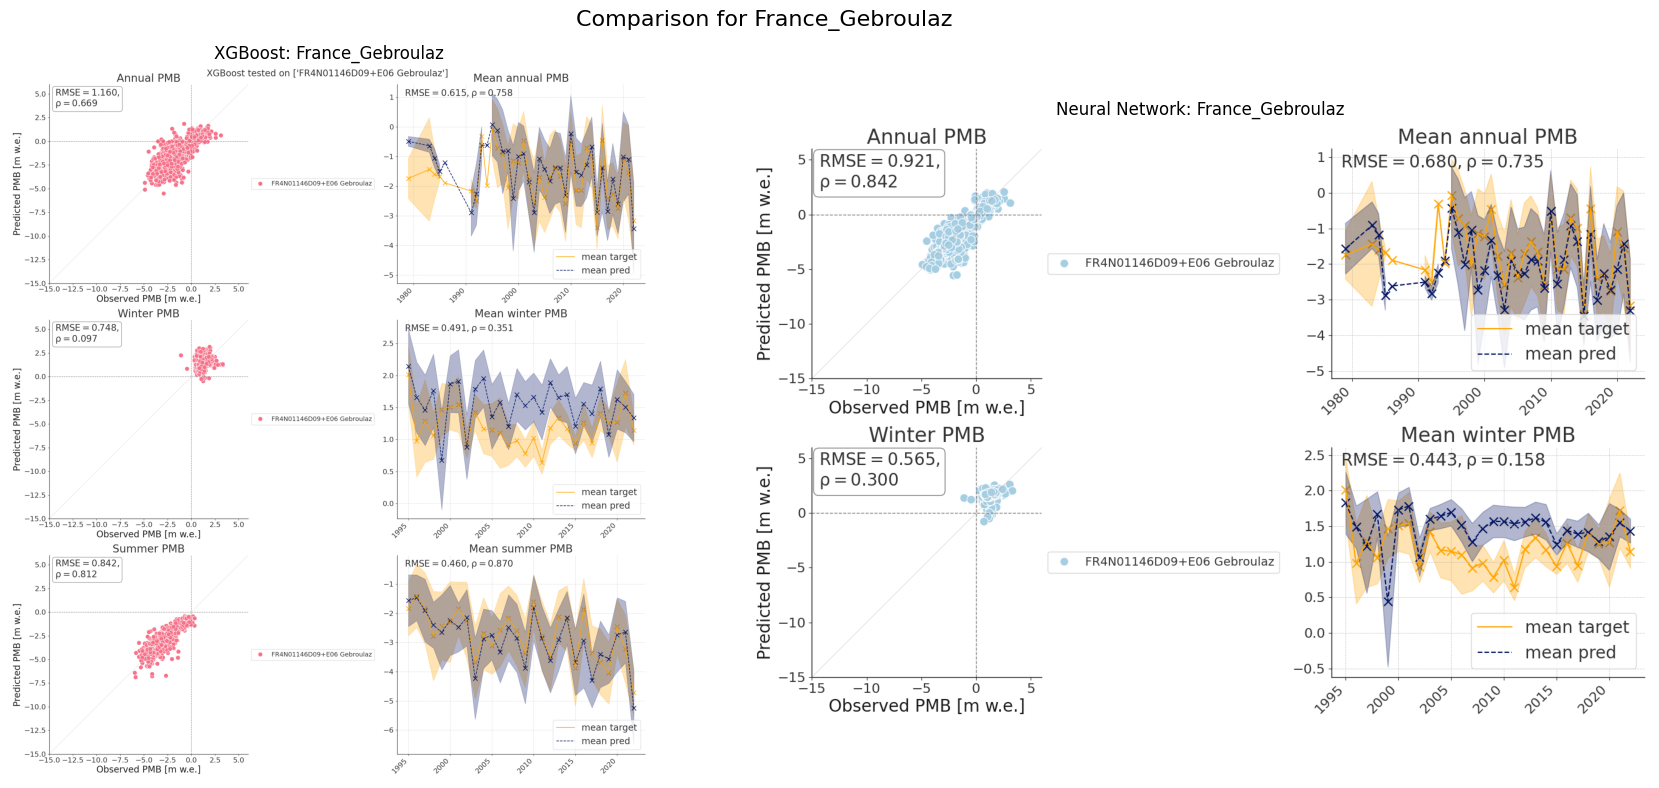

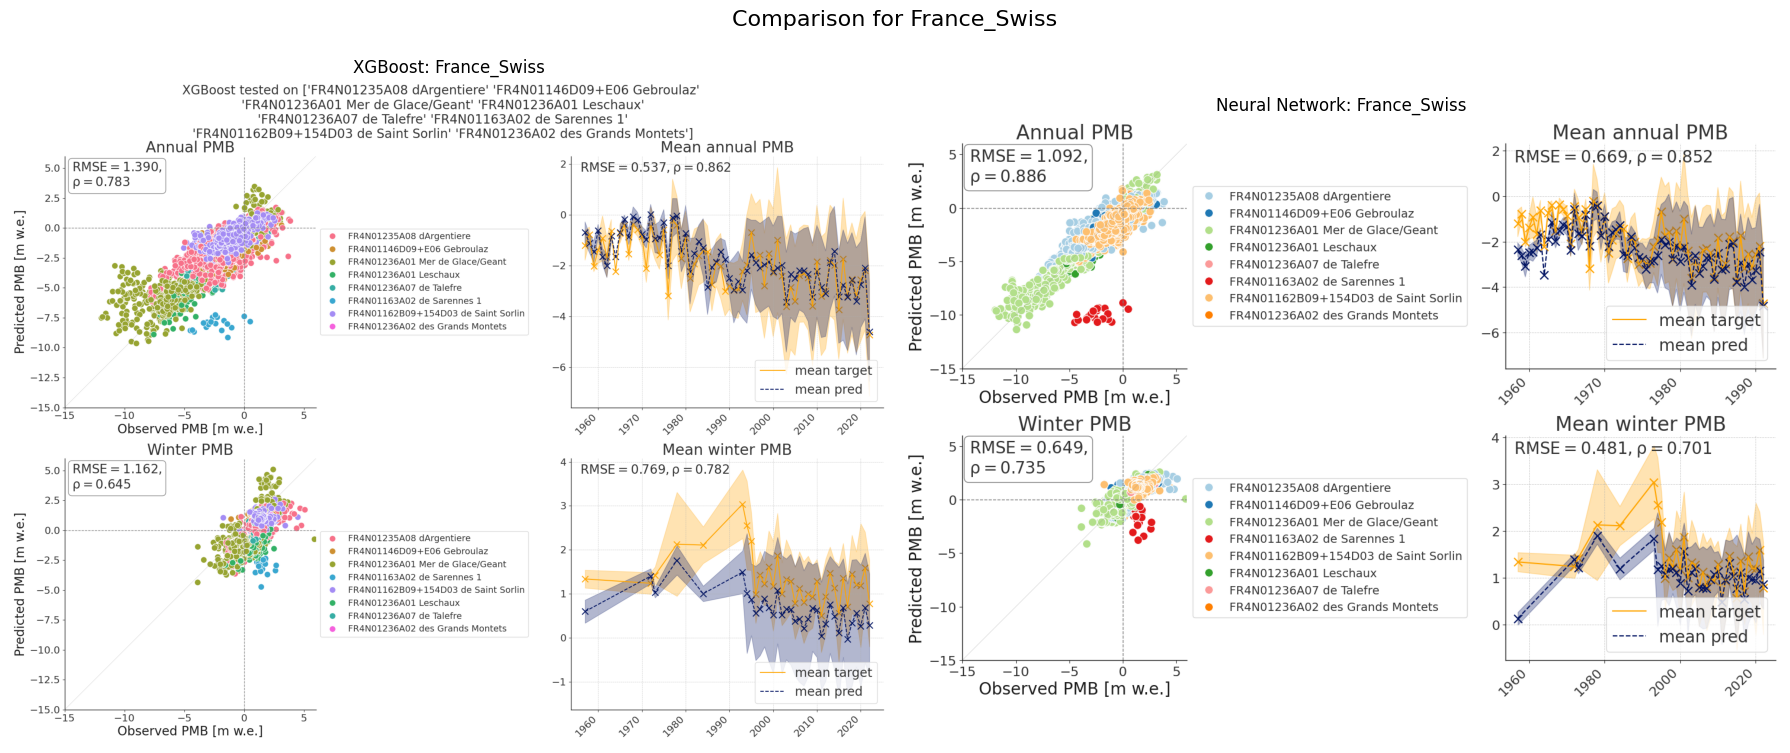

Missing images for France_temporal. XGB exists: True, NN exists: False


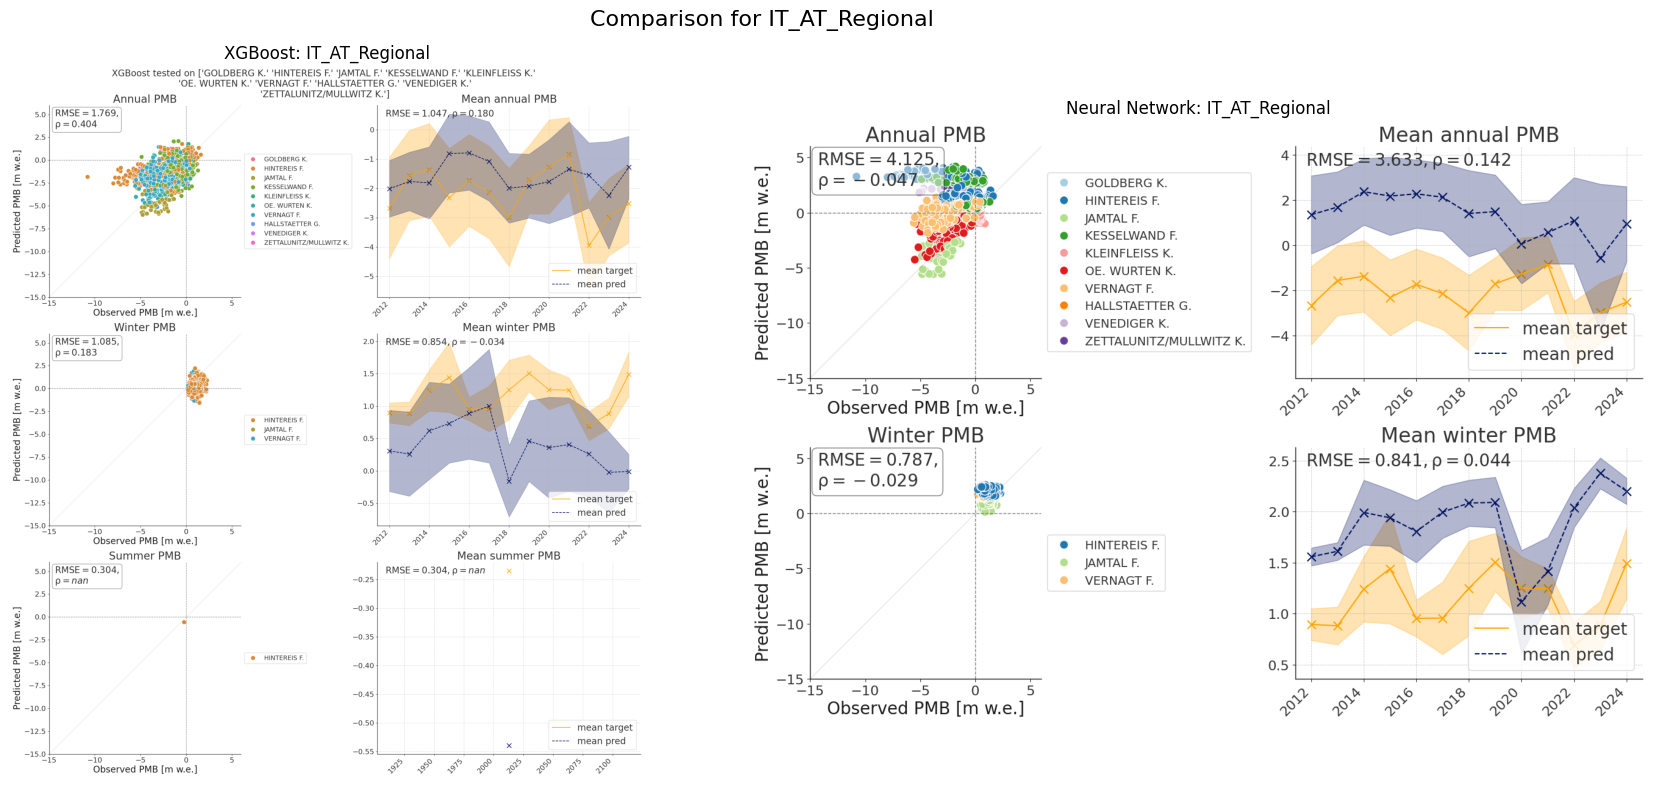

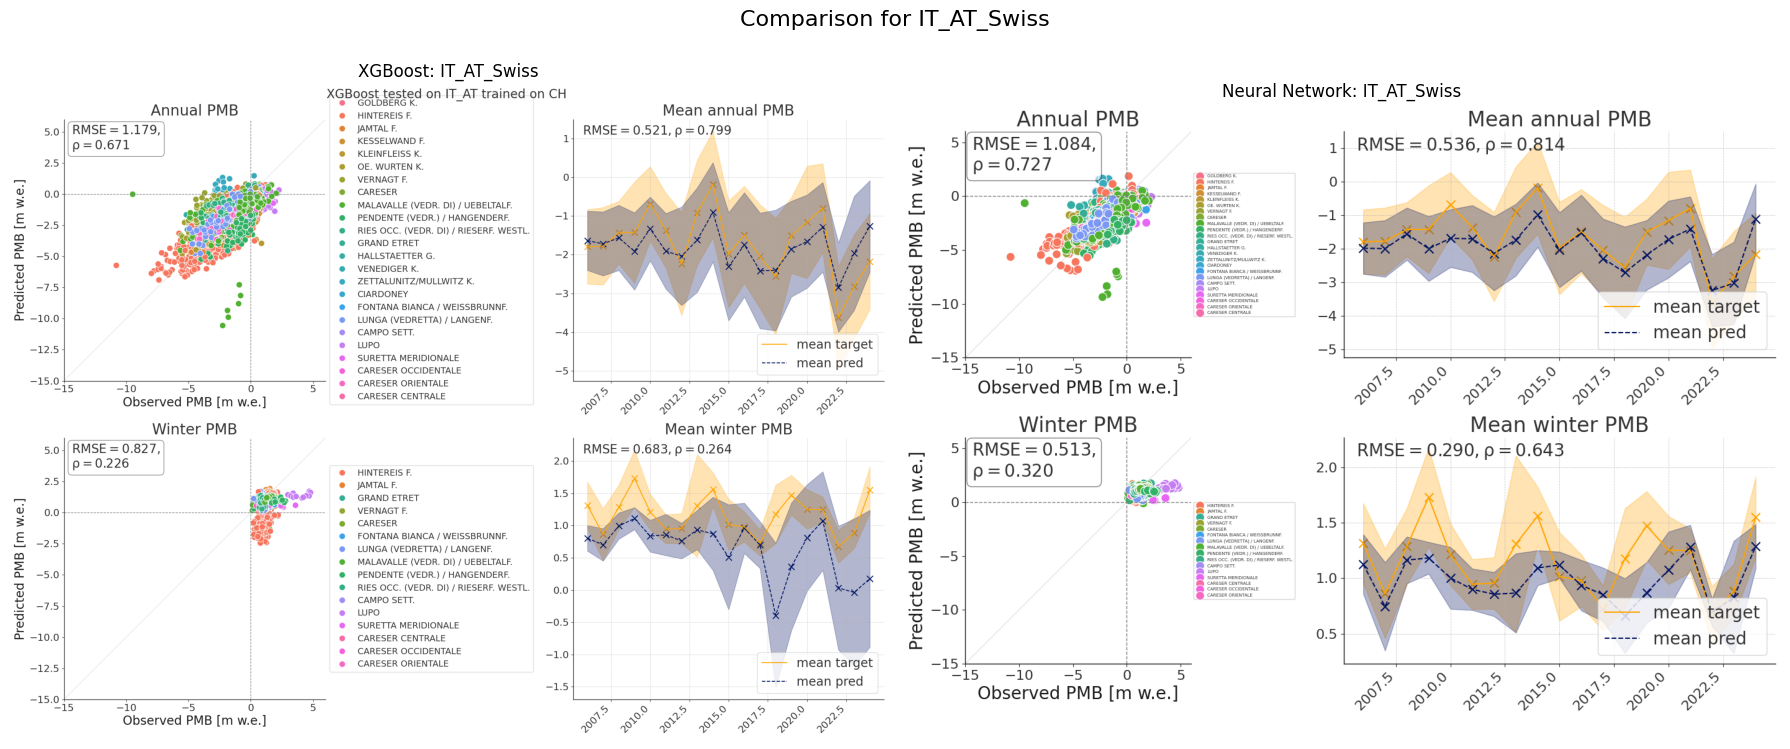

Missing images for Iceland_Regional_badresult. XGB exists: True, NN exists: False


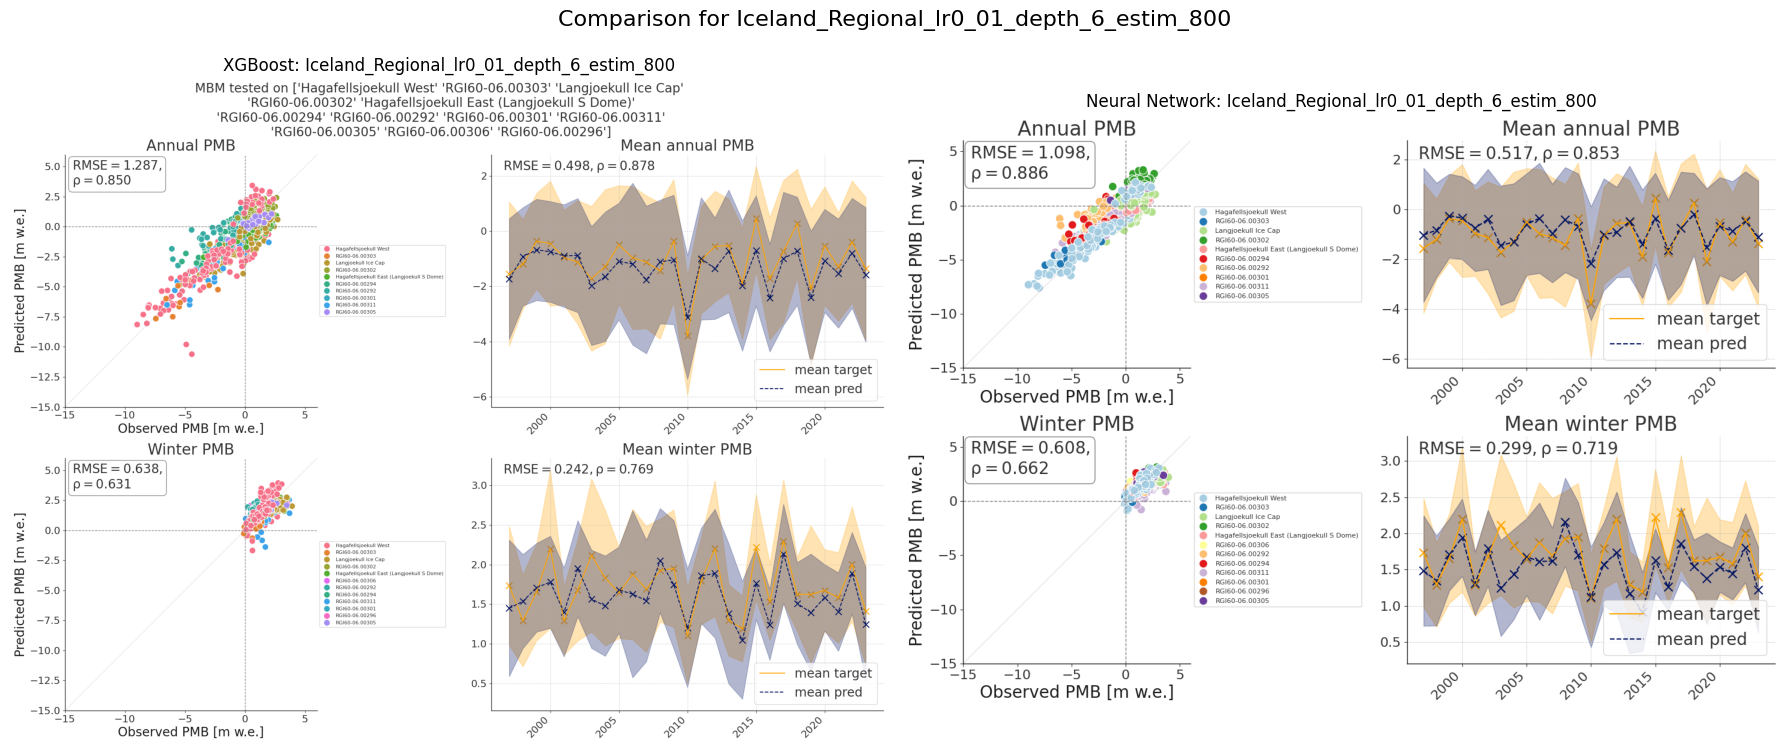

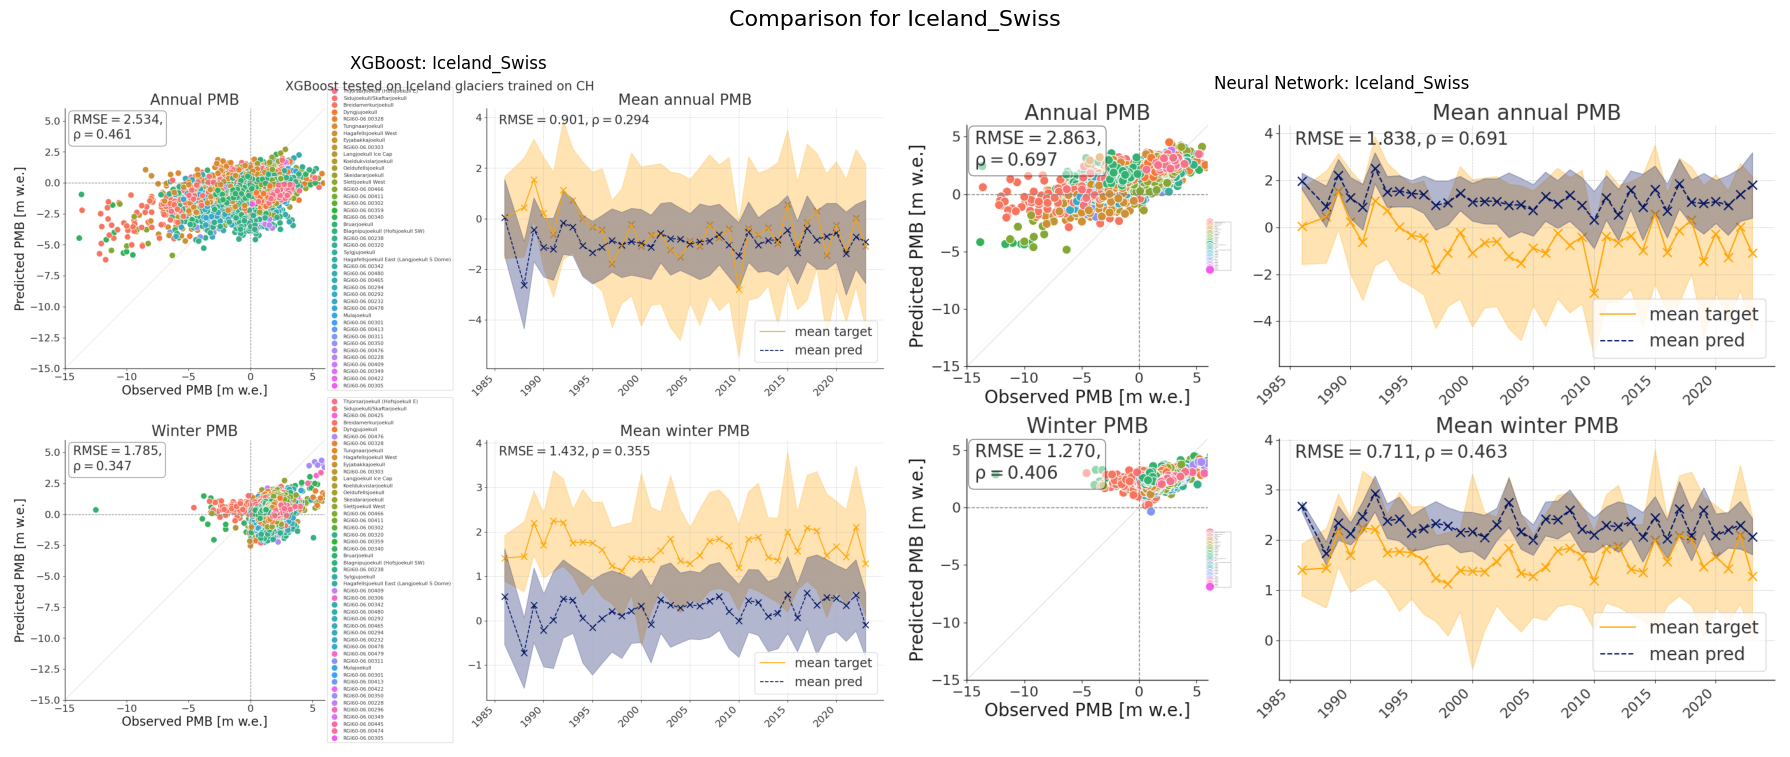

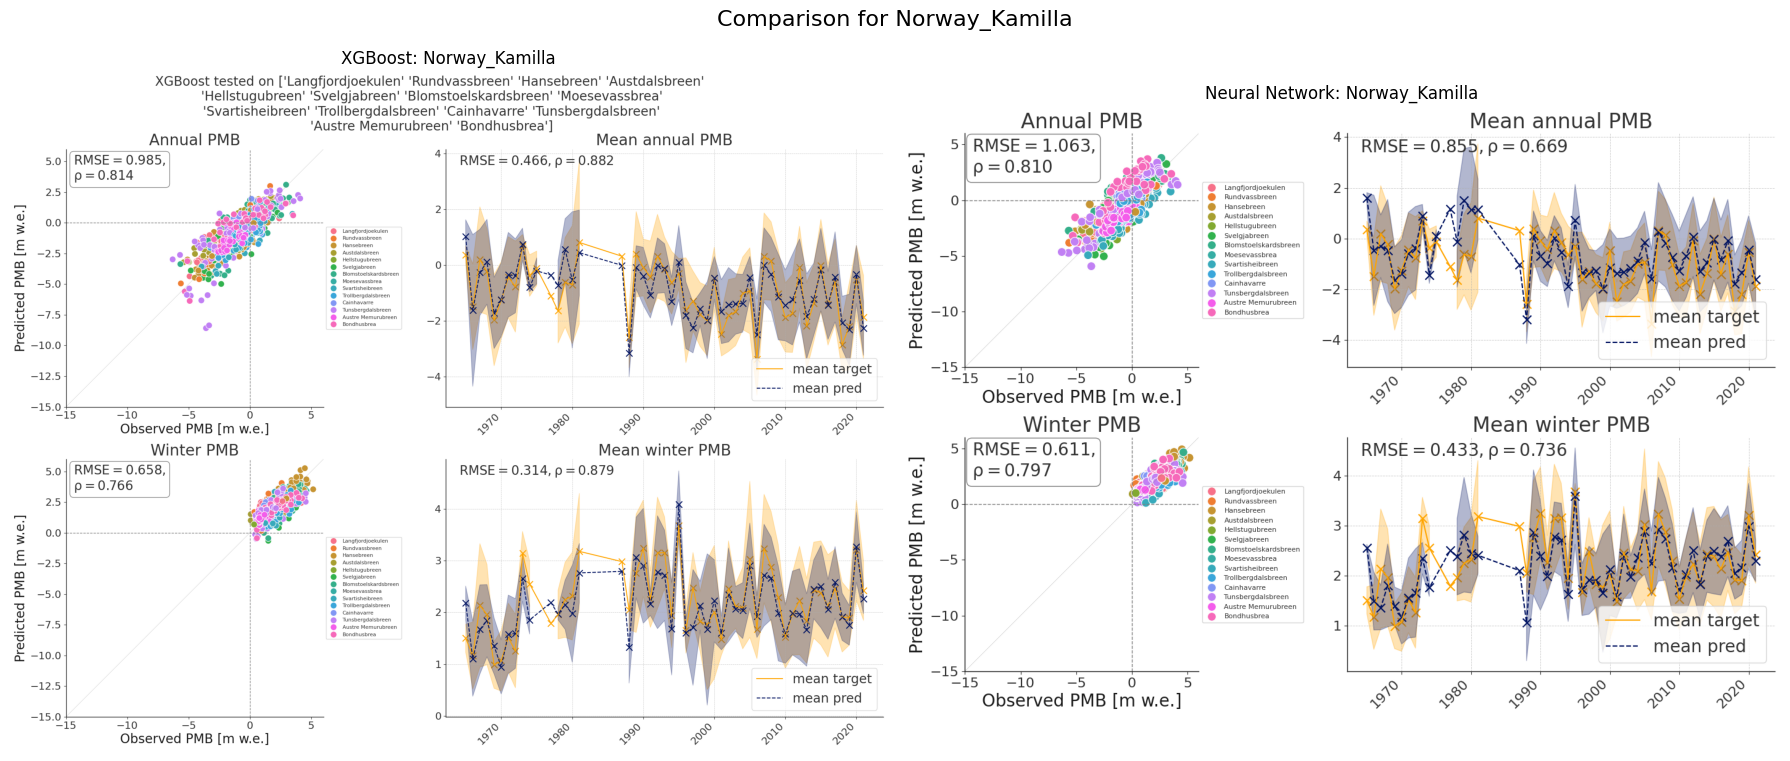

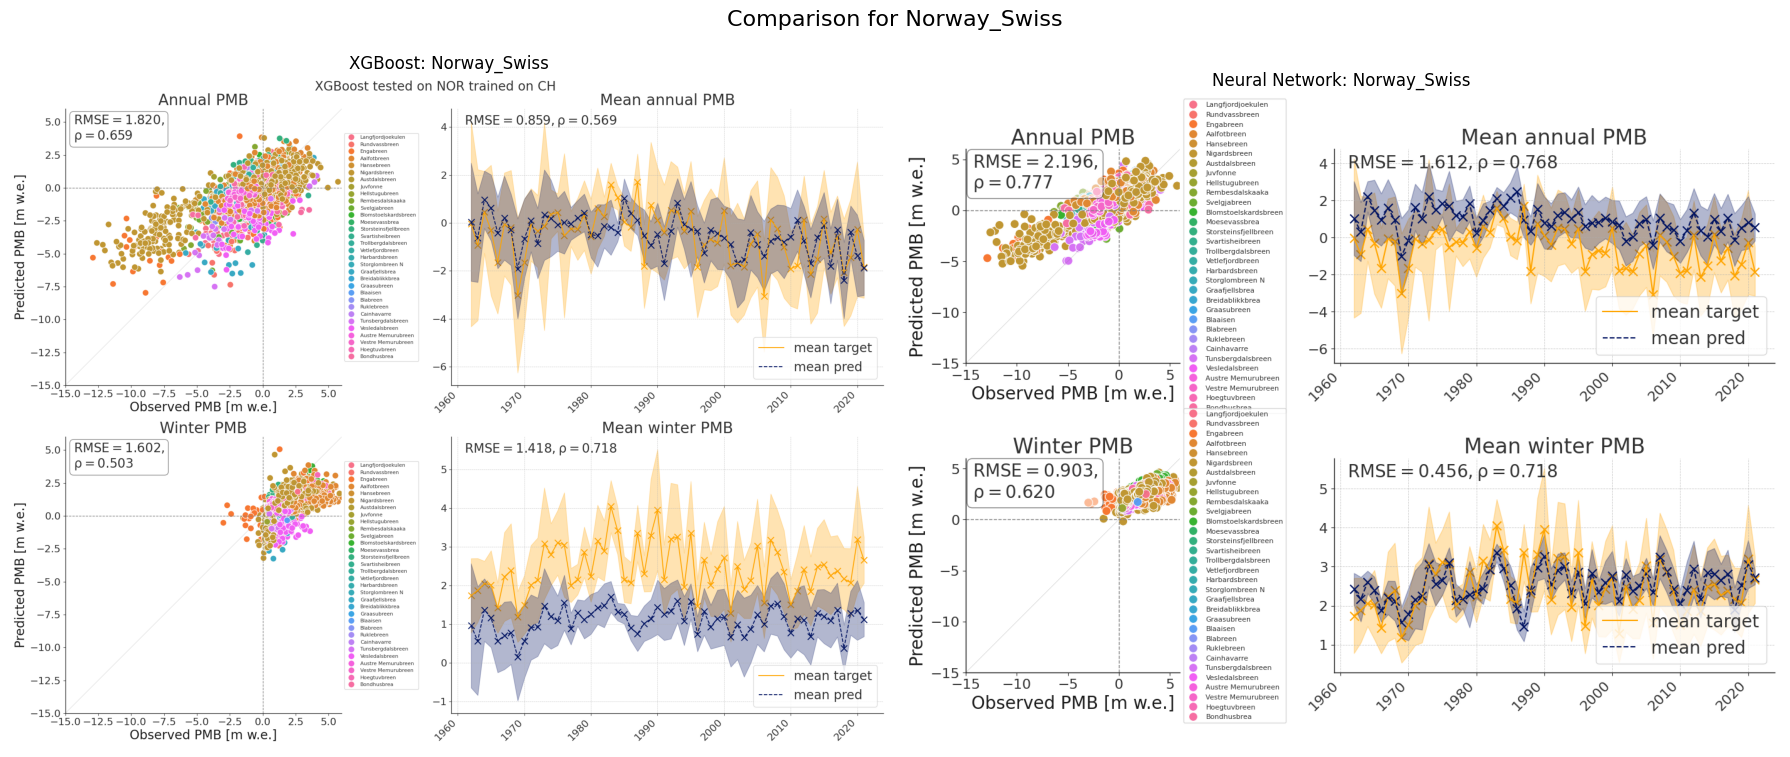

In [12]:
base_dir = '/home/mburlet/scratch/data/DATA_MB/Outputs'

subdirs = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

subdirs.sort()

for subdir in subdirs:
    xgb_image_path = os.path.join(base_dir, subdir, '5.png')
    nn_image_path = os.path.join(base_dir, subdir, 'NN', '1.png')
    
    if os.path.exists(xgb_image_path) and os.path.exists(nn_image_path):
    
        fig, axes = plt.subplots(1, 2, figsize=(18, 8))
        
        # Load and display XGBoost image
        img_xgb = mpimg.imread(xgb_image_path)
        axes[0].imshow(img_xgb)
        axes[0].axis('off')
        axes[0].set_title(f'XGBoost: {subdir}')
        
        # Load and display Neural Network image
        img_nn = mpimg.imread(nn_image_path)
        axes[1].imshow(img_nn)
        axes[1].axis('off')
        axes[1].set_title(f'Neural Network: {subdir}')
        
        fig.suptitle(f'Comparison for {subdir}', fontsize=16)
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"Missing images for {subdir}. XGB exists: {os.path.exists(xgb_image_path)}, NN exists: {os.path.exists(nn_image_path)}")